In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv', header=None, names=['X', 'Y', 'class'])

In [3]:
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


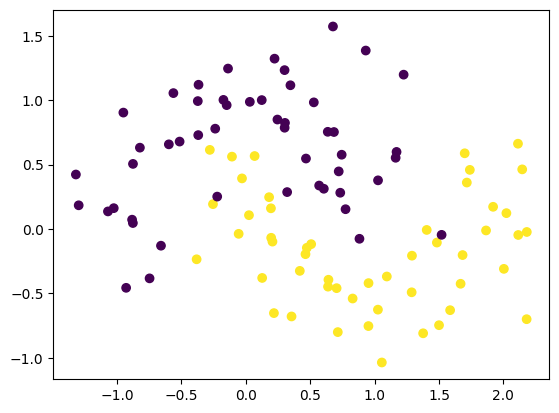

In [4]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [7]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2, kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[ 0.76026607, -1.2266365 , -0.3329403 ,  1.0491185 ,  0.48546788,
         -1.0718236 , -0.20272365,  0.8955872 ,  0.1565563 ,  0.79457676],
        [-1.0827764 ,  1.6549668 ,  0.6556668 ,  1.4575635 ,  1.1639272 ,
         -1.8509874 ,  2.0402586 ,  0.6169954 ,  1.352393  ,  1.4839357 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.597814  , -0.35370293, -0.04803777, -0.6643284 , -0.12299998,
          0.18593022, -0.06699071, -0.00790617,  0.5632522 ,  0.07127695],
        [ 0.25326914, -0.15402989, -0.7555544 ,  0.6826389 , -0.4149557 ,
          0.3095345 ,  0.4260371 , -0.15492178, -0.7766288 , -0.39097768],
        [ 0.45354   , -0.27359167, -0.08786663, -0.507969  ,  0.06381697,
          0.21727645,  0.02822457, -0.03523351,  0.18904348, -1.0079771 ],
        [ 0.9290895 , -0.14831045, -0.04879358, -0.0998427 , -0.65231067,
          0.05541022, -0.20201583,  0.3713674 ,  0.32897642, -0.07179501],
        [-0.29567

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10) * np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1) * np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[ 0.91251034, -0.63663906,  0.5192337 , -0.52062947,  0.05748705,
         -0.11948406,  0.91155416, -0.90398896, -0.31144103, -0.8490903 ],
        [-1.5096508 , -0.17531538, -0.03158022, -0.20251481,  1.0774397 ,
          1.0897523 , -0.8758147 ,  0.96280295,  0.54902834,  0.06597423]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.33313423,  0.01197636, -0.63653517, -0.289353  , -0.2407727 ,
         -0.10009894, -0.5268202 ,  0.22824179,  0.06916769, -0.15489307],
        [ 0.06832256,  0.31342724, -0.26341656,  0.1961417 , -0.16997223,
         -0.19731738, -0.5768994 , -0.29080465, -0.41106662,  0.00750201],
        [ 0.02648348,  0.21646158, -0.14585088, -0.20215963,  0.04949393,
          0.25397444,  0.02119267,  0.1398777 , -0.03774211, -0.22372146],
        [ 0.49411467, -0.04082995,  0.3746465 , -0.25674677, -0.35550168,
         -0.00370357,  0.01166762, -0.25561428,  0.42676616,  0.33250478],
        [-0.02707

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X, Y, epochs=500, validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.4688 - loss: 0.8357 - val_accuracy: 0.5000 - val_loss: 0.7469
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5000 - loss: 0.7413 - val_accuracy: 0.5000 - val_loss: 0.7239
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5078 - loss: 0.7260 - val_accuracy: 0.5000 - val_loss: 0.7002
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5102 - loss: 0.7148 - val_accuracy: 0.5500 - val_loss: 0.6769
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5047 - loss: 0.6887 - val_accuracy: 0.5500 - val_loss: 0.6529
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5523 - loss: 0.6606 - val_accuracy: 0.5500 - val_loss: 0.6297
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5914 - loss: 0.6557 - val_accuracy: 0.7000 - val_loss: 0.6079
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6430 - loss: 0.6053 - val_accuracy: 0.7500 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 764us/step


<Axes: >

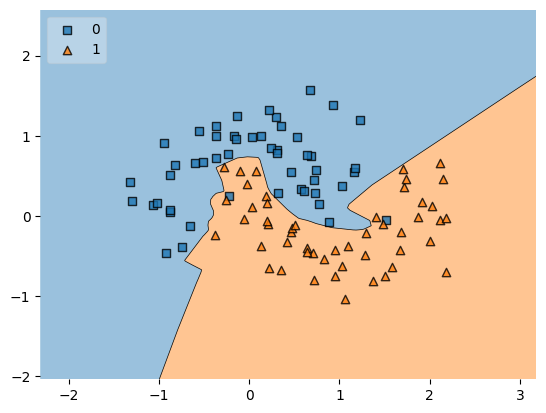

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y.astype('int'), clf=model, legend=2)